In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# ANALISIS EXPLORATORIO DE DATOS

## ¿ QUE TIPO DE DATO TIENEN LAS VARIABLES DEL CONJUNTO DE DATOS?

In [4]:
penguins_df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


## ¿CUÁNTAS VARIABLES DE CADA TIPO DE DATOS TENEMOS EN EL CONJUNTO DE DATOS?

In [5]:
penguins_df.dtypes.value_counts()

,count
float64,4
object,3


## ¿ CUÁNTAS VARIABLES Y OBSERVACIONES TENEMOS EN EL CONJUNTO DE DATOS?

In [6]:
penguins_df.shape

(344, 7)

## ¿EXISTEN VALORES NULOS EXPLICITOS EN EL COJUNTO DE DATOS?

In [7]:
penguins_df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [8]:
penguins_df.isnull().any()

,0
species,False
island,False
bill_length_mm,True
bill_depth_mm,True
flipper_length_mm,True
body_mass_g,True
sex,True


## ¿CUANTOS VALORES NULOS TENEMOS POR CADA VARIABLE?

In [9]:
penguins_df.isnull().sum().sort_values(ascending=False)

,0
sex,11
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
species,0
island,0


## ¿CUÁNTOS VALORES NULOS TENEMOS EN TOTAL EN EL CONJUNTO DE DATOS?

In [10]:
penguins_df.isnull().sum().sum()

19

## ¿ CUÁL ES LA PROPORCIÓN DE VALORES NULOS POR CADA VARIABLE?

In [11]:
plot_null_penguins = penguins_df.isnull().melt(value_name='missing')
plot_null_penguins

,variable,missing
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2403,sex,True
2404,sex,False
2405,sex,False
2406,sex,False


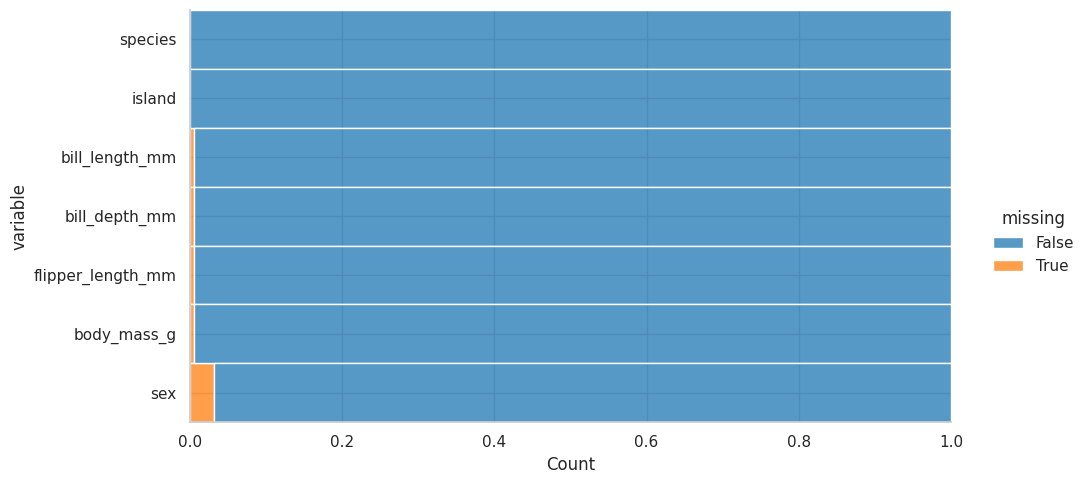

In [13]:
sns.displot(data=plot_null_penguins,y='variable',hue='missing',aspect=2,multiple='fill')

## ¿ CÓMO PODEMOS VISUALIZAR LOS VALORES NULOS EN TODO EL CONJUNTO DE DATOS?

<Axes: >

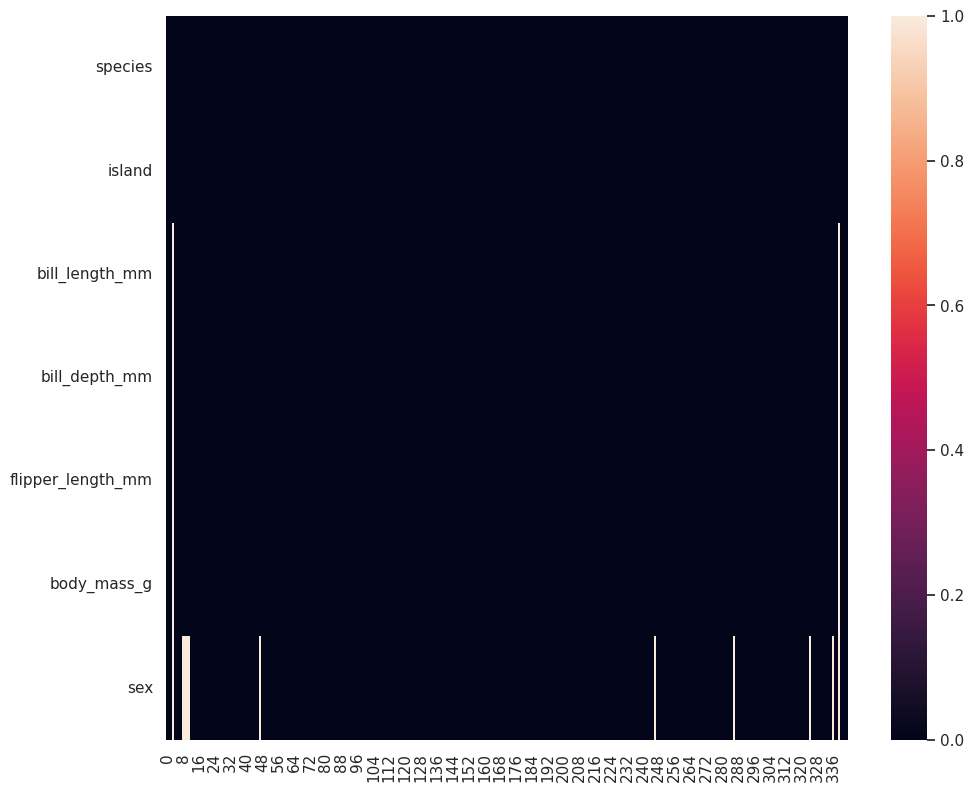

In [14]:
(
    penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿CUÁNTAS OBSERVACIONES PERDEMOS SI ELIMINAMOS LOS DATOS FALTANTES?

In [15]:
processed_penguins_df = (
    penguins_df
    .dropna()
)
processed_penguins_df.shape

(333, 7)

In [17]:
penguins_df.shape[0] - processed_penguins_df.shape[0]

11